In [1]:
import json
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import sys
sys.path.insert(0, '../utils')
import visualization

In [3]:
df_train = visualization.json_to_df('../data/raw/train.json')

,head.id,head.type,head.word,relation,sentence,tail.id,tail.type,tail.word
0,/guid/9202a8c04000641f8000000000038574,"/location/dated_location,/location/place_with_...",Syracuse,/location/location/contains,She also oversaw the refinancing of the state ...,/guid/9202a8c04000641f80000000002fe8e4,"/common/topic,/geography/geographical_feature,...",Onondaga Lake
1,/guid/9202a8c04000641f8000000000038574,"/location/dated_location,/location/place_with_...",Syracuse,/location/location/contains,More than 2.5 million cubic yards of contamina...,/guid/9202a8c04000641f80000000002fe8e4,"/common/topic,/geography/geographical_feature,...",Onondaga Lake
2,/guid/9202a8c04000641f8000000000038574,"/location/dated_location,/location/place_with_...",Syracuse,/location/location/contains,"The Onondaga Nation has about 1,500 members , ...",/guid/9202a8c04000641f80000000002fe8e4,"/common/topic,/geography/geographical_feature,...",Onondaga Lake
3,/guid/9202a8c04000641f80000000001f517f,"/biology/breed_origin,/location/country,/book/...",Turkey,/location/location/contains,He was born in Istanbul but raised in the east...,/guid/9202a8c04000641f800000000014a6f5,"/location/location,/common/topic,/location/cit...",Adana
4,/guid/9202a8c04000641f80000000001f517f,"/biology/breed_origin,/location/country,/book/...",Turkey,/location/location/contains,"By the end of his most recent tour , Rollins h...",/guid/9202a8c04000641f800000000014a6f5,"/location/location,/common/topic,/location/cit...",Adana


,head.id,head.type,head.word,relation,sentence,tail.id,tail.type,tail.word
count,522611,522611,522611,522611,522611,522611,522611,522611
unique,49278,28343,49105,56,255212,48648,27868,48477
top,/guid/9202a8c04000641f800000000054dd5d,"/location/administrative_division,/business/em...",New York,NA,"METRO TOUR SERVICE Brooklyn tours , featuring ...",/guid/9202a8c04000641f800000000054dd5d,"/location/administrative_division,/business/em...",New York
freq,16793,16793,16793,385664,158,10642,10642,10642


Relations in alphabetical order:

{'/broadcast/content/location': 8,
 '/broadcast/producer/location': 71,
 '/business/business_location/parent_company': 19,
 '/business/company/advisors': 9,
 '/business/company/founders': 901,
 '/business/company/industry': 6,
 '/business/company/locations': 19,
 '/business/company/major_shareholders': 328,
 '/business/company/place_founded': 648,
 '/business/company_advisor/companies_advised': 2,
 '/business/company_shareholder/major_shareholder_of': 198,
 '/business/person/company': 7336,
 '/business/shopping_center/owner': 1,
 '/business/shopping_center_owner/shopping_centers_owned': 1,
 '/film/film/featured_film_locations': 18,
 '/film/film_festival/location': 4,
 '/film/film_location/featured_in_films': 18,
 '/location/administrative_division/country': 7286,
 '/location/br_state/capital': 4,
 '/location/cn_province/capital': 2,
 '/location/country/administrative_divisions': 7286,
 '/location/country/capital': 8883,
 '/location/de_state/capital': 7

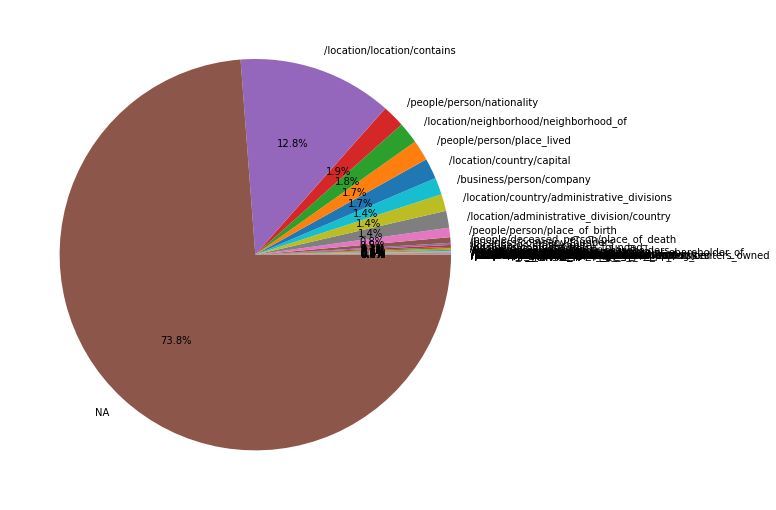

Relation distribution without NA:



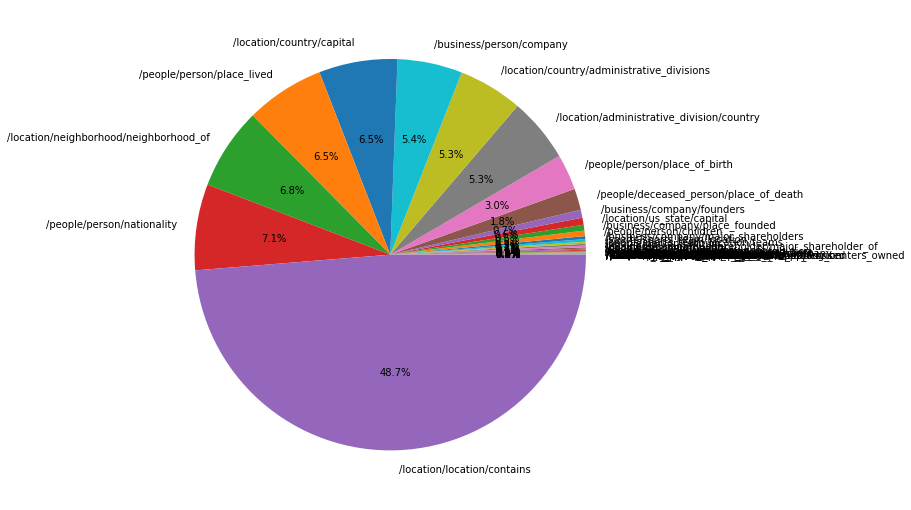

Examples:

sentence: Earlier this week , the company said it expected to sell Madrid Xanadú and its half-interest in two other malls , Vaughan Mills in Ontario and St. Enoch Centre in Glasgow , to Ivanhoe Cambridge , a Montreal company that is Mills 's partner in the Canadian and Scottish properties .
head.word: Madrid Xanadú
relation: /business/shopping_center/owner
tail.word: Ivanhoe Cambridge

sentence: Earlier this week , the company said it expected to sell Madrid Xanadú and its half-interest in two other malls , Vaughan Mills in Ontario and St. Enoch Centre in Glasgow , to Ivanhoe Cambridge , a Montreal company that is Mills 's partner in the Canadian and Scottish properties .
head.word: Ivanhoe Cambridge
relation: /business/shopping_center_owner/shopping_centers_owned
tail.word: Madrid Xanadú

sentence: A perfect expression of the island 's historic contradictions is the headless marble statue , in Fort-de-France , of Marie-Jos èphe - Rose Tascher de la Pagerie , the most famous

sentence: At first glance , it would be hard to imagine a movie more immediately topical than '' The Caiman , '' Nanni Moretti 's new film about Silvio Berlusconi , the media tycoon turned politician who has dominated Italian public life for at least a decade .
head.word: Italian
relation: /people/ethnicity/people
tail.word: Nanni Moretti

sentence: In a career that included more than 130 films , Mr. Delli Colli worked with generations of Italian directors , including Pier Paolo Pasolini , Sergio Leone , Federico Fellini and Roberto Benigni .
head.word: Sergio Leone
relation: /people/person/ethnicity
tail.word: Italian

sentence: Nor is it customary to hear testimony on land use from the fashion designer Tory Burch ; Revlon 's chairman , Ronald Perelman ; or the dermatologist Dr. Patricia Wexler .
head.word: Ronald Perelman
relation: /business/company_shareholder/major_shareholder_of
tail.word: Revlon

sentence: Al Azhar , Sunni Islam 's highest authority , was brought under direct sta

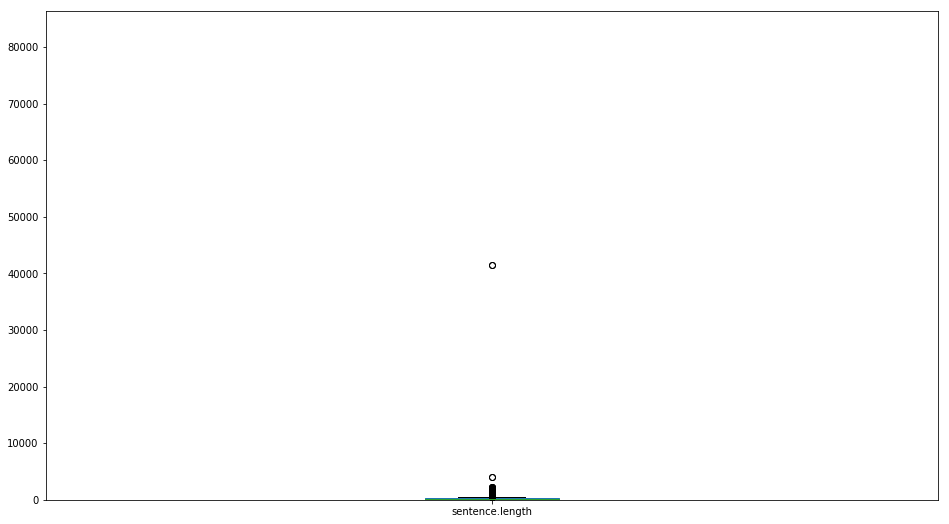

In [4]:
df_train.head()
df_train.describe()
visualization.analyze_data_set(df_train)

In [7]:
df_test = visualization.json_to_df('../data/raw/test.json')

,head.id,head.type,head.word,relation,sentence,tail.id,tail.type,tail.word
0,/guid/9202a8c04000641f8000000000078105,"/base/jewlib/topic,/common/topic,/user/narphor...",Arthur Schnitzler,/people/person/place_of_birth,"The Little Comedy , '' a mannered operetta bas...",/guid/9202a8c04000641f800000000006bea9,"/location/administrative_division,/base/arthis...",Vienna
1,/guid/9202a8c04000641f800000000006daf1,"/common/topic,/user/narphorium/people/topic,/u...",Roberto Calvi,/people/person/nationality,A court in Rome acquitted five people accused ...,/guid/9202a8c04000641f800000000001de10,"/location/dated_location,/aviation/aircraft_ow...",Italy
2,/guid/9202a8c04000641f8000000003147149,"/user/narphorium/people/nndb_person,/music/art...",Johnny Rivers,/people/person/place_lived,There were also performers who were born in Lo...,/guid/9202a8c04000641f8000000000024ba1,"/location/administrative_division,/common/topi...",Louisiana
3,/guid/9202a8c04000641f800000000002e90b,"/base/coloniesandempire/topic,/meteorology/cyc...",Philippines,/location/location/contains,"When Julian Resuello , the mayor of San Carlos...",/guid/9202a8c04000641f8000000000687b53,"/location/statistical_region,/location/citytow...",San Carlos City
4,/guid/9202a8c04000641f800000000018820d,"/base/scotland/topic,/people/person,/base/todo...",Alex Salmond,/people/person/nationality,"A3 Concern Raised by Libya Deal Alex Salmond ,...",/guid/9202a8c04000641f8000000000035837,"/base/popstra/topic,/user/skud/flags/topic,/bi...",Scotland


,head.id,head.type,head.word,relation,sentence,tail.id,tail.type,tail.word
count,172448,172448,172448,172448,172448,172448,172448,172448
unique,16706,11113,16706,32,45746,16706,11113,16706
top,/guid/9202a8c04000641f80000000083ff842,"/common/topic,/people/ethnicity",American,NA,He is survived by his loving wife of 68 years ...,/guid/9202a8c04000641f80000000083ff842,"/common/topic,/people/ethnicity",American
freq,3989,4141,3989,166004,180,3989,4141,3989


Relations in alphabetical order:

{'/base/locations/countries/states_provinces_within': 1,
 '/business/company/advisors': 8,
 '/business/company/founders': 95,
 '/business/company/major_shareholders': 46,
 '/business/company/place_founded': 20,
 '/business/company_advisor/companies_advised': 8,
 '/business/person/company': 302,
 '/film/film/featured_film_locations': 2,
 '/film/film_location/featured_in_films': 2,
 '/location/administrative_division/country': 424,
 '/location/br_state/capital': 2,
 '/location/country/administrative_divisions': 424,
 '/location/country/capital': 553,
 '/location/country/languages_spoken': 3,
 '/location/location/contains': 2793,
 '/location/neighborhood/neighborhood_of': 68,
 '/location/province/capital': 11,
 '/location/us_county/county_seat': 23,
 '/location/us_state/capital': 39,
 '/people/deceased_person/place_of_burial': 9,
 '/people/deceased_person/place_of_death': 68,
 '/people/ethnicity/geographic_distribution': 136,
 '/people/person/children': 3

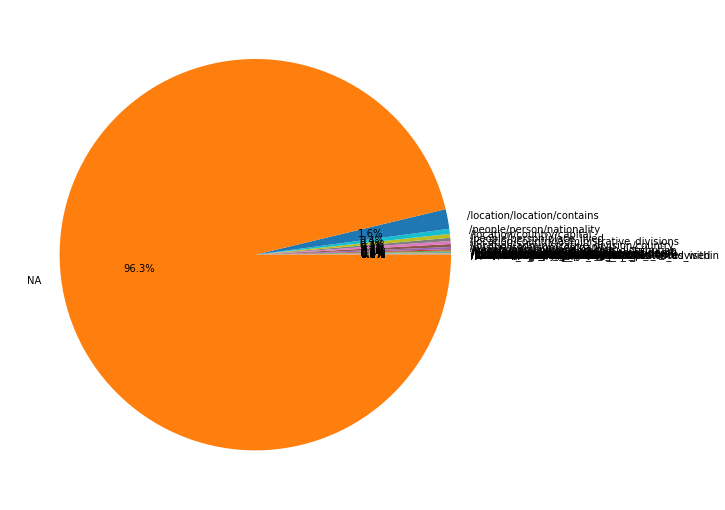

Relation distribution without NA:



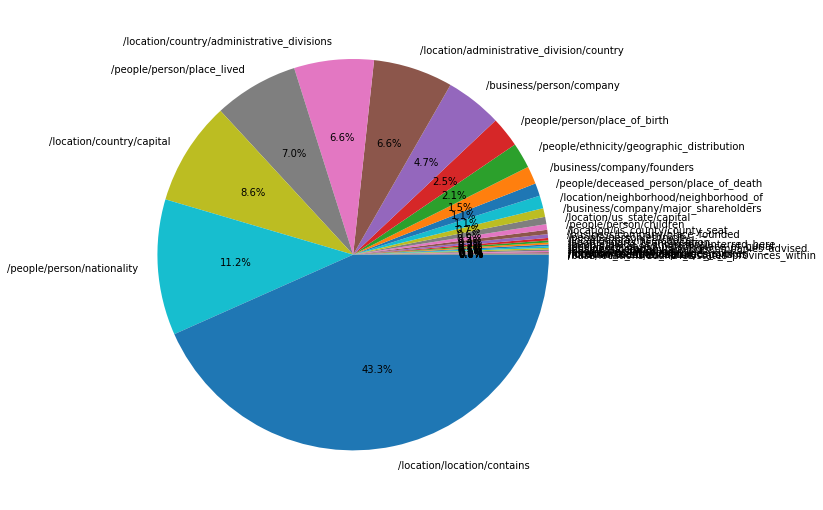

Examples:

sentence: Over the course of my reign and certainly since I first visited Jamestown in 1957 , my country has become a much more diverse society , just as the commonwealth of Virginia and the whole United States of America have also undergone a major social change , '' the queen said . ''
head.word: United States of America
relation: /base/locations/countries/states_provinces_within
tail.word: Virginia

sentence: Other films include '' The Unknown Woman '' -LRB- '' La Sconosciuta '' -RRB- , a thriller about a Ukrainian immigrant to Italy directed by Giuseppe Tornatore -LRB- '' Cinema Paradiso '' -RRB- ; Angelo Longoni 's biopic '' Caravaggio , '' photographed by the great Vittorio Storaro and starring Alessio Boni , who played the younger brother in '' The Best of Youth '' ; and '' Primo Levi 's Journey '' -LRB- '' La Strada di Levi '' -RRB- , a documentary that retraces the tortuous route Levi had to take to return home from Auschwitz in 1945 .
head.word: Best of Youth
relat

sentence: The occasion was suitably exceptional : a reunion of the 1970s-era Sam Rivers Trio , with Dave Holland on bass and Barry Altschul on drums .
head.word: Dave Holland
relation: NA
tail.word: Barry Altschul

Sentence length distribution:

Boxplot of sentence length:



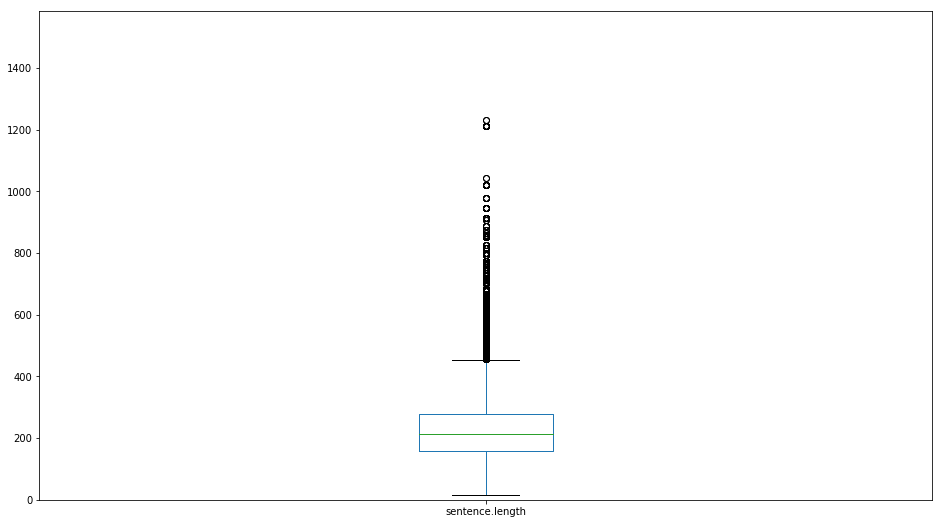

In [8]:
df_test.head()
df_test.describe()
visualization.analyze_data_set(df_test)